In [1]:
import numpy as np 
import pandas as pd 
import gender_guesser.detector as gender

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn import ensemble
from sklearn import metrics

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('data/Rich.csv')
df.head()

,Name,age,country,category,image,marital_status,Education,net_worth,Degree
0,Mary-Kate and Ashley Olsen,34.0,United states,actresses,https://static1.therichestimages.com/wordpress...,Single,Campbell Hall School and New York University,$500 Million,Graduate
1,Jennifer Aniston,52.0,United states,actresses,https://static2.therichestimages.com/wordpress...,Married (Justin Theroux),Fiorello H. LaGuardia High School,$300 Million,high school
2,Julia Roberts,53.0,United states,actresses,https://static3.therichestimages.com/wordpress...,Married (Daniel Moder),Smyrna's Campbell High School,$250 Million,high school
3,Julia Louis Dreyfus,60.0,United states,actresses,https://static2.therichestimages.com/wordpress...,Married (Brad Hall),"Holton-Arms School, Northwestern University",$250 Million,Graduate
4,Sasha Alexander,46.0,United states,actresses,https://static2.therichestimages.com/wordpress...,Married (Edoardo Ponti),University of Southern California's School of...,$215 Million,Graduate


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817 entries, 0 to 1816
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            1817 non-null   object 
 1   age             1639 non-null   float64
 2   country         1462 non-null   object 
 3   category        1817 non-null   object 
 4   image           1817 non-null   object 
 5   marital_status  1635 non-null   object 
 6   Education       1269 non-null   object 
 7   net_worth       1817 non-null   object 
 8   Degree          1273 non-null   object 
dtypes: float64(1), object(8)
memory usage: 127.9+ KB


In [4]:
df.shape
old_row = df.shape[0]

In [5]:
df.isnull().sum()

Name                0
age               178
country           355
category            0
image               0
marital_status    182
Education         548
net_worth           0
Degree            544
dtype: int64

In [6]:
df.describe()

,age
count,1639.000000
mean,55.837706
std,46.716776
min,23.000000
25%,41.000000
50%,53.000000
75%,67.000000
max,1824.000000


In [7]:
df.age.sort_values(ascending=False).head(100)

753     1824.0
862      174.0
440      114.0
1735     108.0
91       104.0
         ...  
134       83.0
136       83.0
452       83.0
138       83.0
185       82.0
Name: age, Length: 100, dtype: float64

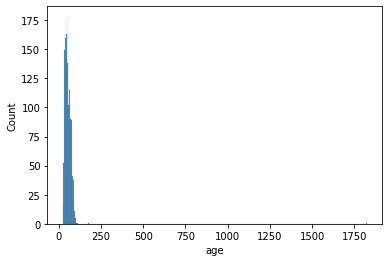

In [10]:
sns.histplot(df.age);

In [11]:
fig = px.box(df, x = 'age')
fig.show()

In [12]:
df.isnull().sum()

Name                0
age               178
country           355
category            0
image               0
marital_status    182
Education         548
net_worth           0
Degree            544
dtype: int64

In [13]:
df[df.age.isnull()]

,Name,age,country,category,image,marital_status,Education,net_worth,Degree
150,Sean Connery,NaN,United kingdom,actors,https://static2.therichestimages.com/wordpress...,Married (Micheline Roquebrune),NaN,$350 Million,Graduate
159,Andrew Shue,NaN,NaN,actors,https://static3.therichestimages.com/wordpress...,NaN,NaN,$100 Million,NaN
401,Maria Franca Fissolo,NaN,Italy,businesswomen,https://static0.therichestimages.com/wordpress...,Widowed (Michele Ferrero),NaN,$33.4 Billion,NaN
410,Iris Fontbona,NaN,NaN,businesswomen,https://static1.therichestimages.com/wordpress...,Widowed (Andrónico Luksic Abaroa),NaN,$16 Billion,NaN
412,Birgit Rausing,NaN,NaN,businesswomen,https://static2.therichestimages.com/wordpress...,Widowed (Gad Rausing),NaN,$12.6 Billion,NaN
...,...,...,...,...,...,...,...,...,...
1793,Bruce Croxon,NaN,Canada,tv-personalities,https://static1.therichestimages.com/wordpress...,Married,NaN,$20 Million,NaN
1794,Aviva Drescher,NaN,United states,tv-personalities,https://static0.therichestimages.com/wordpress...,Married (Reid Drescher),"BA/Vassar College, MA/New York University, BNC...",$20 Million,Graduate
1798,Matt Nordgren,NaN,United states,tv-personalities,https://static2.therichestimages.com/wordpress...,Single,"University of Dallas, University of Texas",$20 Million,Graduate
1799,Star Jones,NaN,NaN,tv-personalities,https://static0.therichestimages.com/wordpress...,NaN,NaN,$18.5 Million,NaN


In [14]:
median_age = df.age.median()
for i in range(len(df)) : 
    if df.age.iloc[i] > 104 : 
        df.age.iloc[i] = median_age 

df.age.fillna(median_age, inplace= True)

C:\Users\Computer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
px.box(df, df.age)

Age distribution : 

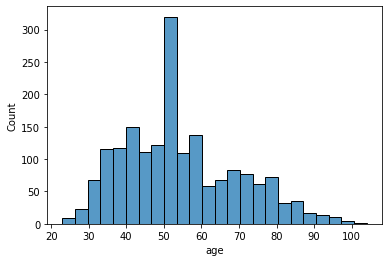

In [16]:
sns.histplot(df.age);

In [26]:
age_bucket = []
for i in range(len(df)) : 
    if (df.age.iloc[i] <= 40) :
        age_bucket.append(1)
    elif (df.age.iloc[i] > 40) and (df.age.iloc[i] <= 60) :
        age_bucket.append(2)
    elif (df.age.iloc[i] > 60) and (df.age.iloc[i] <= 80) :
        age_bucket.append(3)
    elif (df.age.iloc[i] > 80) :
        age_bucket.append(4)

df['age_bucket'] = age_bucket

In [28]:
splitted_name = df.Name.str.split(' ', expand = True )
splitted_name

,0,1,2,3,4,5,6,7,8
0,Mary-Kate,and,Ashley,Olsen,None,None,None,None,None
1,Jennifer,Aniston,None,None,None,None,None,None,None
2,Julia,Roberts,None,None,None,None,None,None,None
3,Julia,Louis,Dreyfus,None,None,None,None,None,None
4,Sasha,Alexander,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
1812,Chuck,Woolery,None,None,None,None,None,None,None
1813,Bill,Kurtis,None,None,None,None,None,None,None
1814,Lydia,Stirling,McLaughlin,None,None,None,None,None,None
1815,Richard,Rawlings,None,None,None,None,None,None,None


In [29]:
df['first_name'] = splitted_name[0]

In [30]:
gd = gender.Detector()
df['Gender'] = df['first_name'].apply(str.capitalize).map(lambda x: gd.get_gender(x))

In [31]:
df['Gender'].unique()

array(['unknown', 'female', 'mostly_male', 'mostly_female', 'male',
       'andy'], dtype=object)

In [32]:
df.Gender.replace({'mostly_male': 'male', 'mostly_female': 'female', 'andy' : 'female', 'unknown' : 'others'}, inplace = True)

In [33]:
df.Gender.value_counts()

male      1189
female     416
others     212
Name: Gender, dtype: int64

In [34]:
fig = go.Figure(data = [go.Pie(labels = df.Gender.value_counts().index, values = df.Gender.value_counts(), hole = 0.5)])
fig.update_layout(
    title_text="Gender ratio",
    annotations=[dict(text='Gender', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [35]:
df.columns

Index(['Name', 'age', 'country', 'category', 'image', 'marital_status',
       'Education', 'net_worth', 'Degree', 'age_bucket', 'first_name',
       'Gender'],
      dtype='object')

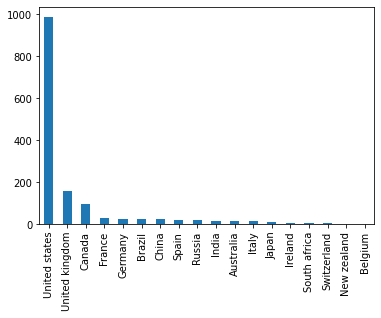

In [36]:
df.country.value_counts().plot(kind = 'bar');

In [37]:
fig = go.Figure(data = [go.Pie(labels = df.country, values = df.country.value_counts(), hole = 0.5)])
fig.update_layout(
    title_text="Successful people in different countries",
    annotations=[dict(text='country', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

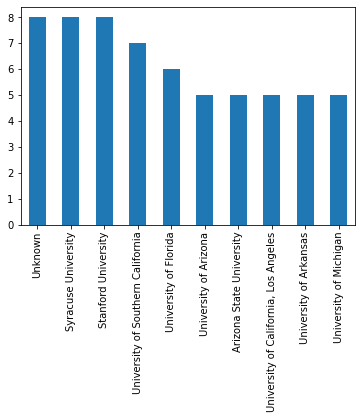

In [38]:
df.Education.value_counts().head(10).plot(kind = 'bar');

In [39]:
fig = go.Figure(data = [go.Pie(labels = df.Education.head(10).dropna(), values = df.Education.value_counts().head(10).dropna(), hole = 0.5)])
fig.update_layout(
    title_text="Successful people in top institutions",
    annotations=[dict(text='Institutions', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [40]:
df.dropna().country.unique()

array(['United states', 'United kingdom', 'South africa', 'Spain',
       'Italy', 'Australia', 'India', 'Canada', 'New zealand', 'France',
       'Japan', 'China', 'Germany', 'Switzerland', 'Brazil', 'Russia',
       'Ireland'], dtype=object)

In [41]:
df[df.country == 'United states'].Education.value_counts()

Syracuse University                            8
University of Southern California              7
Stanford University                            6
New York University                            5
Arizona State University                       5
                                              ..
Yale University, Wharton School of Business    1
Rice University and University of Houston      1
Osseo-Fairchild High School                    1
Dickinson College                              1
Eastern Hills High School                      1
Name: Education, Length: 676, dtype: int64

In [42]:
country_wise_college = {}
for country in df.country.dropna().unique() : 
    trimmed_df = df[df.country == country].dropna()
    country_wise_college[country] = {}
    for i in range(len(trimmed_df)) : 
        if trimmed_df.Education.iloc[i] not in country_wise_college[country].keys() : 
            country_wise_college[country][trimmed_df.Education.iloc[i]] = 1 
        else : 
            country_wise_college[country][trimmed_df.Education.iloc[i]] += 1 

country_wise_top_college = {}
for country in country_wise_college.keys() : 
    country_wise_top_college[country] = ''
    top_college, max_count = '', 0
    for college in country_wise_college[country].keys() : 
        if country_wise_college[country][college] > max_count : 
            max_count = country_wise_college[country][college]
            top_college = college 

    country_wise_top_college[country] = top_college
country_wise_top_college

{'United states': 'Syracuse University',
 'United kingdom': 'University College London',
 'France': 'Ecole Polytechnique (Bachelor of Arts & Science)',
 'Brazil': 'The University of Texas at Austin, Universidade Federal do Rio de Janeiro',
 'South africa': 'National School of the Arts',
 'Spain': "Spain's National Conservatory, Cristina Rota's New York School",
 'Italy': 'University of Perugia',
 'Australia': 'University of Melbourne',
 'India': 'BEc/Hansraj College, Jamia Millia Islamia',
 'Canada': 'McMaster University',
 'New zealand': 'Victoria University of Wellington',
 'Japan': 'Seiryo High School',
 'Germany': 'Hurtwood House school',
 'China': 'Shenzhen University',
 'Switzerland': 'University of St. Gallen ',
 'Russia': 'Kuibyshev Civil Engineering Institute',
 'Ireland': 'Imperial College London',
 'Belgium': ''}

In [43]:
for i in range(len(df)) : 
    if df.Education.isnull()[i] and not df.country.isnull()[i]: 
        df.Education.iloc[i] = country_wise_top_college[df.country.iloc[i]]

C:\Users\Computer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
education_to_country_map = {}

for i in range(len(df)) : 
    if not df.Education.isnull()[i] and df.Education.iloc[i] not in education_to_country_map.keys() : 
        education_to_country_map[df.Education.iloc[i]] = df.country.iloc[i] 
        
education_to_country_map

{'Campbell Hall School and New York University ': 'United states',
 'Fiorello H. LaGuardia High School': 'United states',
 "Smyrna's Campbell High School": 'United states',
 'Holton-Arms School, Northwestern University': 'United states',
 " University of Southern California's School of Cinema-Television": 'United states',
 'Miami Dade Community College, Royal Academy of Dramatic Art in London': 'United states',
 'Tracey Ullman - Italia Conti Academy and Allan McKeown - Beal Grammar school in Ilford': 'United kingdom',
 'Ecole Polytechnique (Bachelor of Arts & Science)': 'France',
 'Syracuse University': 'United states',
 'The University of Texas at Austin, Universidade Federal do Rio de Janeiro': 'Brazil',
 'Colegio Marymount': 'United states',
 'Heritage Elementary School and Options for Youth Charter Schools': 'United states',
 'Beverly Hills High School': 'United states',
 'Fairfax High School': 'United states',
 'Menomonee Falls High School ': 'United states',
 ' Institut Catholiqu

In [45]:
for i in range(len(df)) : 
    if df.country.isnull()[i] and not df.Education.isnull()[i] : 
        df.country.iloc[i] = education_to_country_map[df.Education.iloc[i]]

In [46]:
splitted_net_worth = df.net_worth.str.split(' ', expand = True)
splitted_net_worth

,0,1
0,$500,Million
1,$300,Million
2,$250,Million
3,$250,Million
4,$215,Million
...,...,...
1812,$15,Million
1813,$15,Million
1814,$15,Million
1815,$15,Million


In [47]:
splitted_net_worth[1].unique()

array(['Million', 'Billion'], dtype=object)

In [48]:
fig = go.Figure(data = [go.Pie(labels = splitted_net_worth[1].unique(), values = splitted_net_worth[1].value_counts(), hole = 0.5)])
fig.update_layout(
    title_text="Millionaire vs Billionaire",
    annotations=[dict(text='Net worth', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [49]:
df.net_worth = [
    splitted_net_worth[0].iloc[i][1:] if splitted_net_worth[1].iloc[i] == 'Million' 
    else float(splitted_net_worth[0].iloc[i][1:])*1000 
    for i in range(len(splitted_net_worth[0]))
    ]
df.net_worth

0        500
1        300
2        250
3        250
4        215
        ... 
1812      15
1813      15
1814      15
1815      15
1816    14.5
Name: net_worth, Length: 1817, dtype: object

In [50]:
for unique_marital_status in df.marital_status.unique() : 
    print(unique_marital_status)

Single
Married (Justin Theroux)
Married (Daniel Moder)
Married (Brad Hall)
Married (Edoardo Ponti)
Divorced (Harry Glassman)
Tracey Ullman - Widowed (Allan McKeown)
Divorced (David Bailey)
nan
Married (Joe Manganiello)
Married (Liam Hemsworth)
Divorced (Brad Pitt)
Married Ashton Kutcher (m. 2005–2013), Bruce Willis (m. 1987–2000), Freddy Moore (m. 1980–1985)
Divorced (Billy Mack Hamilton)
Divorced (Romain Dauriac)
Married (Cooke Maroney)
Married (Will Kopelman)
Divorced (Jesse G. James)
Married (Kenneth Bowser)
Divorced (Ted Turner)
Married (Keith Urban)
Married (Michelle Rounds)
Divorced (Sam Mendes)
Married (Matthew Broderick)
Married (François-Henri Pinault)
Married (David E. Kelley)
Divorced (Ben Thomas)
Married (Jim Toth)
Married (Brad Allen)
Divorced (Mark Levinson)
Married (Mark Consuelos)
Divorce Filed (David Arquette)
Widower (Peter Shaw)
Divorced (James Cameron)
Married (James Keach)
Engaged (Olivier Martinez)
Married (Ashton Kutcher)
Divorced (Richard Hamlett)
Married (Chris

In [51]:
splitted_marital_status = df.marital_status.str.split(' ', expand = True )
splitted_marital_status[0].unique()

array(['Single', 'Married', 'Divorced', 'Tracey', nan, 'Divorce',
       'Widower', 'Engaged', 'In', 'Marrried', 'Widowed', 'Annulled',
       'Separated', 'Partner', 'married', 'divorced', 'Spouse:', 'Widow',
       'Iñigo', '', 'Marriage', 'Undisclosed', 'Not', 'Partner:',
       'undisclosed', 'Marko', 'Seperated', 'Seprated', 'Alicia',
       'SIngle', 'Nicole', 'Divoced', 'Spouse'], dtype=object)

In [52]:
splitted_marital_status[splitted_marital_status[0] == '']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
524,,Married,(Patsy,Perin,Dubash),None,None,None,None,None,None,None,None,None,None,None,None


In [53]:
splitted_marital_status[splitted_marital_status[0] == 'Not']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
672,Not,Married,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [54]:
splitted_marital_status[splitted_marital_status[0] == 'Nicole']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1487,Nicole,Smith,(m.,2004),None,None,None,None,None,None,None,None,None,None,None,None,None


In [55]:
splitted_marital_status[splitted_marital_status[0] == 'Iñigo']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
465,Iñigo,Zobel,-,Married,(Maricris,Cardenas-Zobel),and,Mercedes,Zobel,-,Married,(Joseph,R.,McMicking),None,None,None


In [56]:
splitted_marital_status[splitted_marital_status[0] == 'Annulled']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
83,Annulled,(Kenny,Chesney),None,None,None,None,None,None,None,None,None,None,None,None,None,None
1547,Annulled,(Renée,Zellweger),None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [57]:
single = ['single', 'Not', 'Undisclosed', 'undisclosed', 'SIngle', 'Single']
married = ['married', 'Marko', 'Tracey', 'Spouse:', 'Partner:', 'Engaged','Married', 'Marrried', 'Widower', 'Annulled', 'married', 'Spouse', 'Iñigo', 'Marriage', '', 'Widow', 'Widowed', 'Nicole', 'Alicia']
in_a_relationship = ['in', 'Partner', 'In']
divorced = ['divorced', 'Divorced', 'Divoced', 'Divorce', 'Seprated', 'Seperated', 'Separated']

df.marital_status = splitted_marital_status[0]

In [58]:
for i in range(len(df)) : 
    if not df.marital_status.isnull()[i] and df.marital_status.iloc[i] in single : 
        df.marital_status.iloc[i] = 'single'
    elif not df.marital_status.isnull()[i] and df.marital_status.iloc[i] in married : 
        df.marital_status.iloc[i] = 'married'
    if not df.marital_status.isnull()[i] and df.marital_status.iloc[i] in in_a_relationship : 
        df.marital_status.iloc[i] = 'in a relationship'
    if not df.marital_status.isnull()[i] and df.marital_status.iloc[i] in divorced : 
        df.marital_status.iloc[i] = 'divorced'

C:\Users\Computer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
df.marital_status.unique()

array(['single', 'married', 'divorced', nan, 'in a relationship'],
      dtype=object)

In [60]:
df.marital_status.value_counts()

married              1168
divorced              236
single                196
in a relationship      35
Name: marital_status, dtype: int64

In [61]:
fig = go.Figure(data = [go.Pie(labels = df.marital_status.dropna().unique(), values = df.marital_status.value_counts().dropna(), hole = 0.5)])
fig.update_layout(
    title_text="Relationship status : ",
    annotations=[dict(text='Relationship', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [62]:
df.to_csv('preprocessed_df.csv', encoding='utf-8', index= False)

In [63]:
df.marital_status.fillna('married', inplace= True)

In [64]:
df.isnull().sum()

Name                0
age                 0
country           342
category            0
image               0
marital_status      0
Education         197
net_worth           0
Degree            544
age_bucket          0
first_name          0
Gender              0
dtype: int64

In [65]:
degree = []
for i in range(len(df)) :
    try : 
        if 'College' in  df['Education'][i] : 
            degree.append('Graduate')
        elif 'University' in df['Education'][i] : 
            degree.append('Post Graduate')
        elif 'High School' in df['Education'][i] : 
            degree.append('high school')
        elif df['Education'][i] != np.nan : 
            degree.append('Graduate')
        else :
            degree.append('high school')
    except :
        degree.append(np.nan)
# degree
df['Degree'] = degree
# df

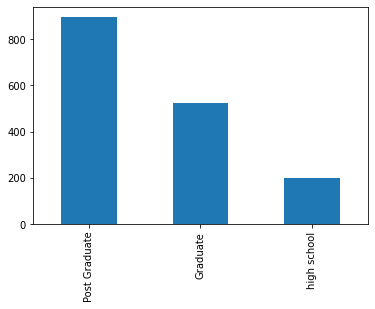

In [66]:
df.Degree.value_counts().plot(kind='bar');

In [67]:
df.Degree.fillna('high school', inplace= True)

In [68]:
df.isnull().sum()

Name                0
age                 0
country           342
category            0
image               0
marital_status      0
Education         197
net_worth           0
Degree              0
age_bucket          0
first_name          0
Gender              0
dtype: int64

In [69]:
df.country.fillna('Others', inplace = True)

<AxesSubplot:>

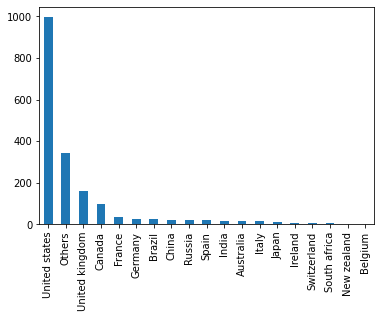

In [70]:
df.country.value_counts().plot(kind = 'bar')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817 entries, 0 to 1816
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            1817 non-null   object 
 1   age             1817 non-null   float64
 2   country         1817 non-null   object 
 3   category        1817 non-null   object 
 4   image           1817 non-null   object 
 5   marital_status  1817 non-null   object 
 6   Education       1620 non-null   object 
 7   net_worth       1817 non-null   object 
 8   Degree          1817 non-null   object 
 9   age_bucket      1817 non-null   int64  
 10  first_name      1817 non-null   object 
 11  Gender          1817 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 170.5+ KB


In [72]:
df.country.unique()

array(['United states', 'United kingdom', 'France', 'Brazil',
       'South africa', 'Others', 'Spain', 'Italy', 'Australia', 'India',
       'Canada', 'New zealand', 'Japan', 'Germany', 'China',
       'Switzerland', 'Russia', 'Ireland', 'Belgium'], dtype=object)

In [73]:
label_encoder = preprocessing.LabelEncoder()
df['country']= label_encoder.fit_transform(df['country'])
df.country.unique()

array([18, 17,  5,  2, 14, 12, 15,  9,  0,  7,  3, 11, 10,  6,  4, 16, 13,
        8,  1])

In [74]:
country_dict = {
    'United states' : 18, 'United kingdom' : 17, 'France' : 5,
    'Brazil' : 2, 'South africa' : 14, 'Others' : 12, 'Spain' : 15, 
    'Italy' : 9, 'Australia' : 0, 'India' : 7, 'Canada' : 3, 
    'New zealand' : 11, 'Japan' : 10, 'Germany' : 6, 'China' : 4,
    'Switzerland' : 16, 'Russia' : 13, 'Ireland' : 8, 'Belgium' : 1
}

In [75]:
df.Degree.unique()

array(['Post Graduate', 'high school', 'Graduate'], dtype=object)

In [76]:
df['Degree']= label_encoder.fit_transform(df['Degree'])
df.Degree.unique()

array([1, 2, 0])

In [77]:
degree_dict = {
    'Post Graduate' : 1, 'high school' : 2, 'Graduate' : 0
}

In [78]:
df.marital_status.unique()

array(['single', 'married', 'divorced', 'in a relationship'], dtype=object)

In [79]:
df['marital_status']= label_encoder.fit_transform(df['marital_status'])
df.marital_status.unique()

array([3, 2, 0, 1])

In [80]:
marital_status_dict = {
    'single' : 3, 'married' : 2, 'divorced' : 0, 'in a relationship' : 1
}

In [81]:
df.category.unique()

array(['actresses', 'actors', 'baseball-players', 'basketball-players',
       'businesswomen', 'businessmen', 'ceos', 'comedians',
       'entrepreneurs', 'directors', 'hockey-players', 'models',
       'musicians', 'nfl-players', 'producers', 'rappers', 'singers',
       'soccer-players', 'tv-personalities'], dtype=object)

In [82]:
df['category']= label_encoder.fit_transform(df['category'])
df.category.unique()

array([ 1,  0,  2,  3,  5,  4,  6,  7,  9,  8, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [83]:
category_dict = {
    'actresses' : 1, 'actors' : 0, 'baseball-players' : 2, 'basketball-players' : 3,
       'businesswomen' : 5, 'businessmen' : 4, 'ceos' : 6, 'comedians' : 7,
       'entrepreneurs' : 9, 'directors' : 8, 'hockey-players' : 10, 'models' : 11,
       'musicians' : 12, 'nfl-players' : 13, 'producers' : 14, 'rappers' : 15, 'singers' : 16,
       'soccer-players' : 17, 'tv-personalities' : 18
}

In [84]:
df.Gender.unique()

array(['others', 'female', 'male'], dtype=object)

In [85]:
df['Gender']= label_encoder.fit_transform(df['Gender'])
df.Gender.unique()

array([2, 0, 1])

In [86]:
gender_dict = {
    'others' : 2, 'female' : 0, 'male' : 1
}

In [87]:
df['net_worth'] = df['net_worth'].astype(float)

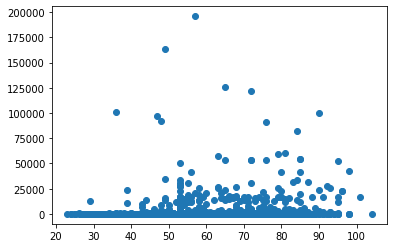

In [88]:
plt.scatter(df['age'], df['net_worth']);

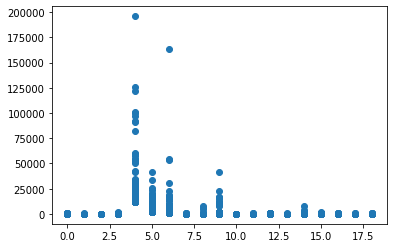

In [89]:
plt.scatter(df['category'], df['net_worth']);

In [90]:
fig = px.box(df, x = 'net_worth')
fig.show()

In [91]:
df = df[df.net_worth < 670]

In [92]:
fig = px.box(df, x = 'age')
fig.show()

In [93]:
df = df[df.age < 92]

In [94]:
x = df.drop(labels = ['Name', 'image', 'Education', 'net_worth', 'first_name', 'age'], axis = 1)
y = df['net_worth']

In [95]:
x

,country,category,marital_status,Degree,age_bucket,Gender
0,18,1,3,1,1,2
1,18,1,2,2,2,0
2,18,1,2,2,2,0
3,18,1,2,1,2,0
4,18,1,2,1,2,1
...,...,...,...,...,...,...
1812,18,18,2,2,3,1
1813,18,18,1,1,3,1
1814,18,18,2,1,2,0
1815,18,18,2,2,2,1


In [96]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]    
                col_corr.add(colname)
    return col_corr

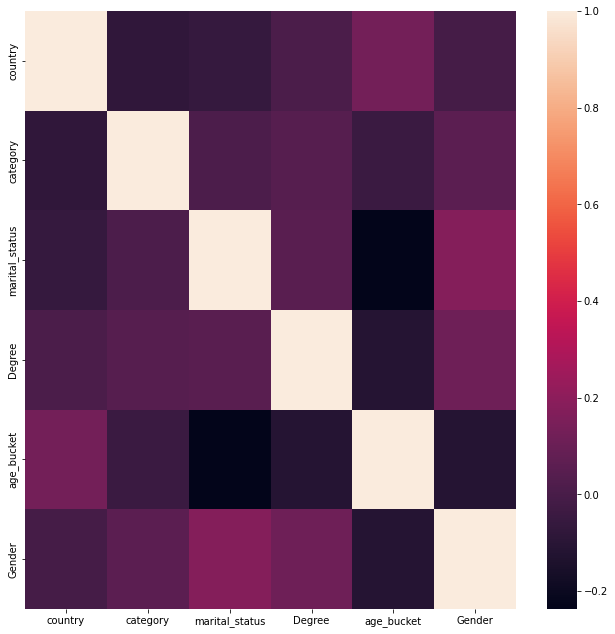

In [97]:
corrmat = x.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat);

In [98]:
corr_features = correlation(x, 0.7)
len(set(corr_features))

0

In [99]:
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [100]:
print(model.feature_importances_)

[0.13378021 0.44036345 0.1267841  0.10030061 0.10279592 0.09597571]


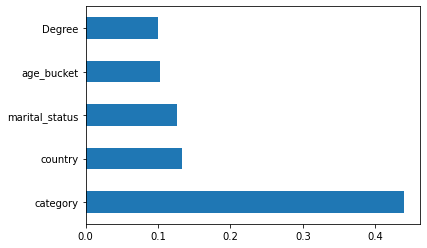

In [101]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [102]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [103]:
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size = 0.2, random_state = 42
)

In [104]:
reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)
metrics.mean_squared_error(y_pred, y_test, squared=False)

102.83717224432812

In [105]:
regr = DecisionTreeRegressor(max_depth=5)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
metrics.mean_squared_error(y_pred, y_test, squared=False)

105.42805378923441

In [106]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
metrics.mean_squared_error(y_pred, y_test, squared=False)

104.12190468961572

In [107]:
regr = KNeighborsRegressor(n_neighbors=10)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
metrics.mean_squared_error(y_pred, y_test, squared=False)

107.25360850693767

In [108]:
regr = SVR()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
metrics.mean_squared_error(y_pred, y_test, squared=False)

108.61405144121917

In [109]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [110]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [111]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(
                        estimator = rf, 
                        param_distributions = random_grid,
                        scoring='neg_mean_squared_error', 
                        n_iter = 10, cv = 5, verbose=2, 
                        random_state=42, n_jobs = 1
                    )

In [112]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [113]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 20}

In [114]:
predictions=rf_random.predict(x_test)

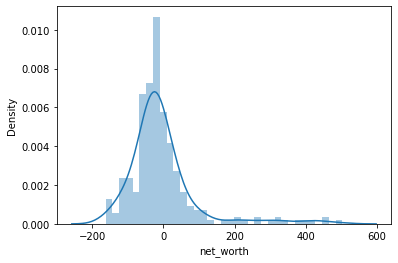

In [115]:
sns.distplot(y_test-predictions);

In [117]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 61.68355936308567


In [118]:
print('RMSE:', pow(metrics.mean_squared_error(y_test, predictions), 0.5))

RMSE: 98.75422334119543


In [103]:
import pickle
file = open('random_forest_regression_model.pkl', 'wb')

pickle.dump(rf_random, file)

In [104]:
import joblib
joblib.dump(rf_random, 'random_forest_regression_model.sav')

['random_forest_regression_model.sav']